## **23.02.06 to make main figure**

In [13]:
from TO_sim.Sol_Kuramoto import *
from TO_sim.gen_Distribution import *
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm
import pandas as pd

from TO_sim.To_Draw import Draw_theoretical_wData as DD
from TO_sim.To_Draw import Draw_theoretical as DDD
from TO_sim.Hysteresis_Kuramoto import Hysteresis_pd_init_pvel as Hp
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

from TO_sim.Utility import *
import parmap

In [26]:
DF = 'Review/23.02.06 to make main figure/'
Create_Folder(DF)
N = 500
dist = 'Normal'
t_end = 2000
ss = 10
N = 500
dK = 0.2
dt = 0.1
m = 0
applys = [1]
save = True
ms = [6]
core = [len(ms) if len(ms)<10 else 10][0]
print(core)
# Draw_ = DD(m=m,dist = 'Normal')
df_sets = {}
rdf_sets = {}

for m in ms:
    df,rdf = Hp(m,N=N,t_end=t_end,dist = dist,dt = 0.1,dK=dK, shuffle = True, shuffle_seed = ss+1,Init_dtheta=False,Init_dtheta_seed=applys, seed=10\
                ,second_initial_state = False,Init_dtheta_omega = False)
    df_sets[m] = df
    rdf_sets[m] = rdf

1


In [27]:
rdf_dtheta = rdf.dtheta_s

In [28]:
temp =  rdf_dtheta[5.1]

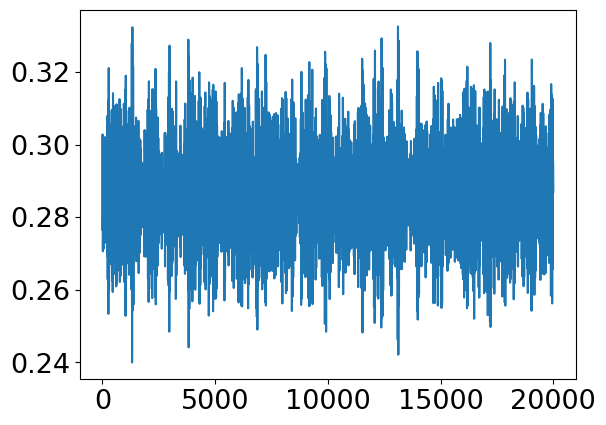

In [29]:
temp =  rdf_dtheta[5.1]
plt.plot(np.var(temp,axis=1))

In [30]:
import math

In [31]:
def mean_wtime(x):
    temp = x[-200:,:]
    result = np.mean(temp,axis=0)
    return result
m = 6
df,rdf = df_sets[m],rdf_sets[m]
mtheta_df = df.theta_s.apply(mean_wtime)
mtheta_rdf = rdf.theta_s.apply(mean_wtime)

In [32]:
m = 6
ST = 50
df = df_sets[m]
rdf = rdf_sets[m]
Ks = df.index
data_rs = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
data_std = [np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
data_rrs = [np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
data_rstd = [np.std(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
data_rmin = [np.min(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
max_std = np.argmax(data_std)
min_std = np.argmin(data_std)
min_r = np.argmin(data_rmin)
print(Ks[min_r],Ks[max_std],Ks[min_std])


2.1 4.3 11.3


In [33]:
ST = 50
Ks = df.index
Ksr = rdf.index
Create_Folder(DF+f'{dist}/')
def Draw_Kr(m,ax):
    df = df_sets[m]
    rdf = rdf_sets[m]
    data_rs = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_std = [np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rrs = [np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rstd = [np.std(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    categories = ['Theoretical', 'Simulated']
    Draw_ = DD(m=m,dist='Normal')
    # Draw_ = DDD(m=m)
    plt.sca(ax)
    fw,(bw,bwd) = Draw_.total()

    err_fw = plt.errorbar(Ks,data_rs,data_std,fmt='.',color='tab:blue',capsize=2,label=r'Foward($K\uparrow$)')
    err_bw = plt.errorbar(Ksr,data_rrs,data_rstd,fmt='.',color='tab:Orange',capsize=2,label=r'Backward($K\downarrow$)')
    p5, = plt.plot([0], marker='None',
           linestyle='None', label='dummy-tophead')
    p7, = plt.plot([0],  marker='None',
           linestyle='None', label='dummy-empty')
    
    leg3 = plt.legend([p5, fw, err_fw, p5, bw, err_bw],
                      [r'Foward($K\uparrow$)'] + categories + [r'Backward($K\downarrow$)'] + categories,
                      loc = 4,ncol=2) # Two columns, vertical group labels
#     leg4 = plt.legend([p5, p7, p5, p7, fw, err_fw, bw, err_bw],
#               [r'Foward($K\uparrow$)', '', r'Backward($K\downarrow$)', ''] + categories + categories,
#               loc=4, ncol=2) # Two columns, horizontal group labels
    
    plt.grid()

    plt.xlim(0,13)
    plt.ylim(0,1)

    plt.xlabel('Coupling constant(K)',fontsize=13)
    plt.ylabel('Order parameter(r)',fontsize=13)
    plt.tight_layout()
    # plt.savefig(DF+f'{dist}/m = {m}, dK = {dK}, K vs r graph.png',dpi=400)
def make_sinij(m,K_idx,ax):
    def mean_wtime(x):
        temp = x[-100:,:]
        result = np.mean(temp,axis=0)
        return result
    plt.sca(ax)
    df = df_sets[m]
    mtheta_df = df.theta_s.apply(mean_wtime)
    seg_theta = mtheta_df.iloc[K_idx]
    i,j = np.meshgrid(seg_theta,seg_theta)
    im = plt.imshow(np.sin(j-i),vmin=-1,vmax=1,cmap = 'seismic',origin='lower',aspect='auto')
    plt.xticks([0,500])
    plt.yticks([0,500])
    plt.xlabel('i-th oscillator',fontsize=15)
    plt.ylabel('j-th oscillator',fontsize=15)
    # plt.title(f'K = {Ks[K_idx]}',fontsize=18)
    div = make_axes_locatable(ax)
    cax = div.append_axes("right", size="2%", pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    cbar.set_ticks([-1,0,1])
    cbar.set_label(r'$\sin(\theta_j-\theta_i)$')
def make_sinij_nocbar(m,K_idx,ax):
    def mean_wtime(x):
        temp = x[-100:,:]
        result = np.mean(temp,axis=0)
        return result
    plt.sca(ax)
    df = df_sets[m]
    mtheta_df = df.theta_s.apply(mean_wtime)
    seg_theta = mtheta_df.iloc[K_idx]
    i,j = np.meshgrid(seg_theta,seg_theta)
    im = plt.imshow(np.sin(j-i),vmin=-1,vmax=1,cmap = 'seismic',origin='lower',aspect='auto')
    plt.xticks([0,500])
    plt.yticks([0,500])
    plt.xlabel('i-th oscillator',fontsize=15)
    plt.ylabel('j-th oscillator',fontsize=15)

In [34]:
def mean_graph(ln):
    ln_x , ln_y = ln.get_data()
    dK_=0.01
    ln_Ks1 = np.arange(ln_x[0],ln_x[0]+1.5,dK_)
    ln_K1 = [np.where((ln_x>=ln_Ks1[i])&(ln_x<(ln_Ks1[i]+dK_))) for i in range(len(ln_Ks1))]
    ln_r1 = [np.mean(ln_y[idx]) for idx in ln_K1]
    dK_ = 0.1
    ln_Ks2 = np.arange(ln_Ks1[-1],np.max(ln_x),dK_)
    ln_K2 = [np.where((ln_x>=ln_Ks2[i])&(ln_x<(ln_Ks2[i]+dK_))) for i in range(len(ln_Ks2))]
    ln_r2 = [np.mean(ln_y[idx]) for idx in ln_K2]
    ln_Ks = np.r_[ln_Ks1,ln_Ks2]
    ln_r = np.array(ln_r1+ln_r2)
    ln.set_data([ln_Ks,ln_r])
# fw_r = fw_y[fw_K]

def dK_graph(ln,dK):
    ln_x , ln_y = ln.get_data()
    ln_Ks = np.arange(ln_x[0],ln_x[-1],dK)
    ln_Kidx = np.searchsorted(ln_x,ln_Ks)
    ln_r = ln_y[ln_Kidx]
    ln.set_data([ln_Ks,ln_r])

In [42]:
ST = 50
Ks = df.index
Ksr = rdf.index
multi_ = 1.5
Create_Folder(DF+f'{dist}/')
def Draw_Kr(m,ax):
    df = df_sets[m]
    rdf = rdf_sets[m]
    data_rs = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_std = [np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rrs = [np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rstd = [np.std(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    plt.sca(ax)
    categories = ['Theoretical', 'Simulated']
    if dist == 'Normal':
        Draw_ = DD(m=m,dist='Normal')
        fw,(bw,bwd) = Draw_.total()
        dK_graph(fw,dK=0.05)
        dK_graph(bw,dK=0.05)
        dK_graph(bwd,dK=0.05)
    else:
        Draw_ = DDD(m=m)
        fw,(bw,bwd) = Draw_.total()


    # mean_graph(fw)
    # mean_graph(bw)
    # mean_graph(bwd)
    fw.set_linestyle('--')
    bw.set_linestyle('--')
    bwd.set_linestyle('--')
    err_fw = plt.errorbar(Ks,data_rs,data_std,fmt='.',color='tab:blue',capsize=4,elinewidth=2,capthick=3,ms=10,label=r'Foward($K\uparrow$)')
    err_bw = plt.errorbar(Ksr,data_rrs,data_rstd,fmt='.',color='tab:Orange',capsize=4,elinewidth=2,capthick=3,ms=10,label=r'Backward($K\downarrow$)')
    p5, = plt.plot([0], marker='None',
           linestyle='None', label='dummy-tophead')
    p7, = plt.plot([0],  marker='None',
           linestyle='None', label='dummy-empty')
    
    leg3 = plt.legend([p5, fw, err_fw, p5, bw, err_bw],
                      [r'Foward ($K\uparrow$)'] + categories + [r'Backward ($K\downarrow$)'] + categories,
                      loc = 4,ncol=2,fontsize=13*multi_) # Two columns, vertical group labels
#     leg4 = plt.legend([p5, p7, p5, p7, fw, err_fw, bw, err_bw],
#               [r'Foward($K\uparrow$)', '', r'Backward($K\downarrow$)', ''] + categories + categories,
#               loc=4, ncol=2) # Two columns, horizontal group labels
    
    plt.grid()

    plt.xlim(0,13)
    plt.ylim(0,1)

    plt.xlabel(r'$K$',fontsize=18*multi_)
    plt.ylabel(r'$r$',fontsize=18*multi_)
    plt.tight_layout()
    # plt.savefig(DF+f'{dist}/m = {m}, dK = {dK}, K vs r graph.png',dpi=400)
def make_sinij(m,K_idx,ax):
    def mean_wtime(x):
        temp = x[-200:,:]
        result = np.mean(temp,axis=0)
        return result
    def last(x):
        temp = x[-1,:]
        # result = np.mean(temp,axis=0)
        return temp
    plt.sca(ax)
    df = df_sets[m]
    # mtheta_df = df.theta_s.apply(mean_wtime)
    mtheta_df = df.theta_s.apply(last)
    seg_theta = mtheta_df.iloc[K_idx]
    i,j = np.meshgrid(seg_theta,seg_theta)
    im = plt.imshow(np.sin(j-i),vmin=-1,vmax=1,cmap = 'seismic',origin='lower',)
    plt.xticks([0,500])
    plt.yticks([0,500])
    plt.xlabel(r'$i^{th}$ oscillator',fontsize=18*multi_)
    plt.ylabel(r'$j^{th}$ oscillator',fontsize=18*multi_)
    # plt.title(f'K = {Ks[K_idx]}',fontsize=18*multi_)
    div = make_axes_locatable(ax)
    cax = div.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax)
    cbar.set_ticks([-1,0,1])
    cbar.set_label(r'$\sin(\theta_j-\theta_i)$',fontsize=15*multi_)
def make_sinij_nocbar(m,K_idx,ax):
    def mean_wtime(x):
        temp = x[-200:,:]
        result = np.mean(temp,axis=0)
        return result
    def last(x):
        temp = x[-1,:]
        # result = np.mean(temp,axis=0)
        return temp
    plt.sca(ax)
    df = df_sets[m]
    # mtheta_df = df.theta_s.apply(mean_wtime)
    mtheta_df = df.theta_s.apply(last)
    seg_theta = mtheta_df.iloc[K_idx]
    i,j = np.meshgrid(seg_theta,seg_theta)
    im = plt.imshow(np.sin(j-i),vmin=-1,vmax=1,cmap = 'seismic',origin='lower',)
    plt.xticks([0,500])
    plt.yticks([0,500])
    plt.xlabel(r'$i^{th}$ oscillator',fontsize=18*multi_)
    plt.ylabel(r'$j^{th}$ oscillator',fontsize=18*multi_)

In [36]:
Ks[min_r]

2.1

In [37]:
Ks[max_std]

4.3

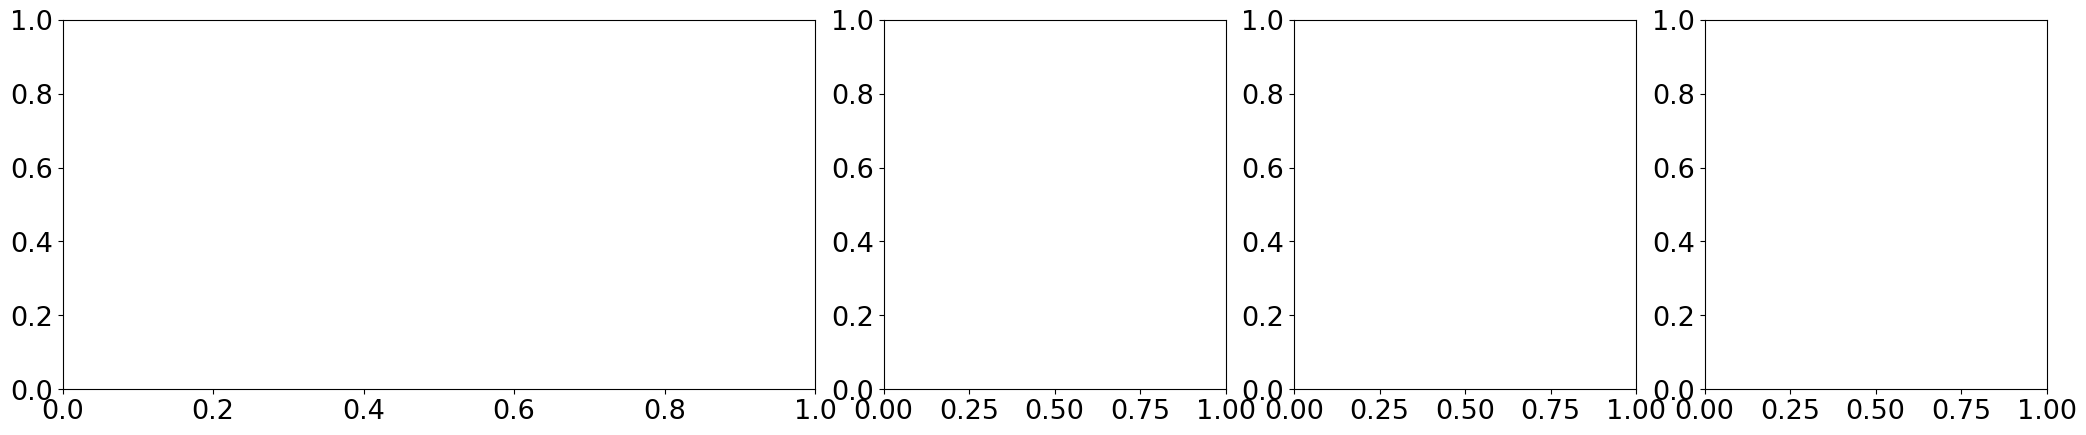

In [38]:
plt.close('all')
fig = plt.figure(figsize=(6.4*4,4.8),facecolor='white')
ax1 = plt.subplot2grid((1, 5), (0, 0),colspan = 2,rowspan=1,fig=fig)
ax2 = plt.subplot2grid((1, 5), (0, 2),colspan = 1,rowspan=1,fig=fig)
ax3 = plt.subplot2grid((1, 5), (0, 3),colspan = 1,rowspan=1,fig=fig)
ax4 = plt.subplot2grid((1, 5), (0, 4),colspan = 1,rowspan=1,fig=fig)

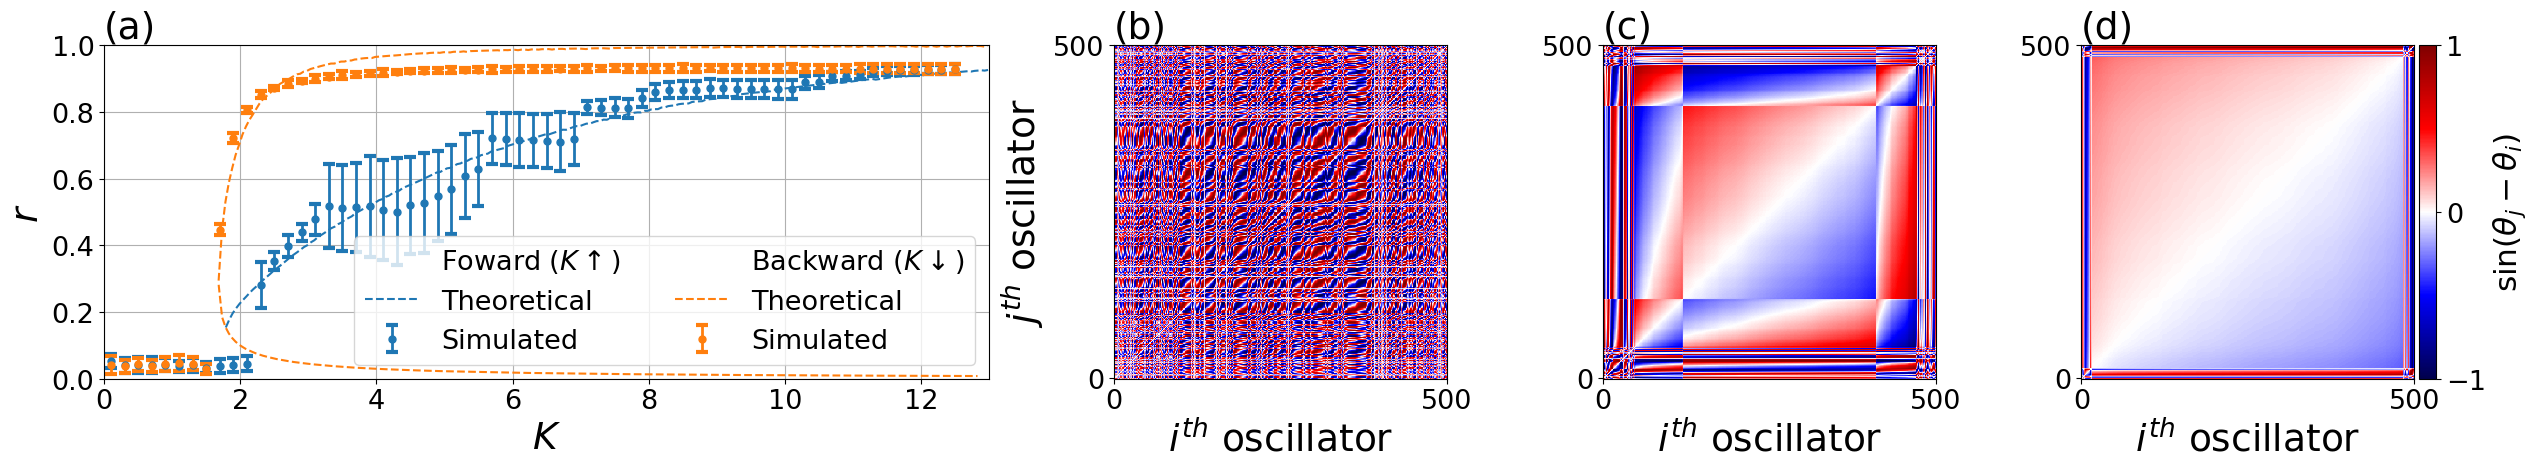

In [43]:
plt.close('all')
plt.style.use('default')
fig = plt.figure(figsize=(6.4*4,4.8),facecolor='white')
plt.rc('xtick',labelsize=13*multi_)
plt.rc('ytick',labelsize=13*multi_)

ax1 = plt.subplot2grid((1, 5), (0, 0),colspan = 2,rowspan=1,fig=fig)
ax2 = plt.subplot2grid((1, 5), (0, 2),colspan = 1,rowspan=1,fig=fig)
ax3 = plt.subplot2grid((1, 5), (0, 3),colspan = 1,rowspan=1,fig=fig)
ax4 = plt.subplot2grid((1, 5), (0, 4),colspan = 1,rowspan=1,fig=fig)

# ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
# ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
# ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
Draw_Kr(m,ax1)
make_sinij_nocbar(m,min_r,ax2)
make_sinij_nocbar(m,max_std,ax3)

# make_sinij_nocbar(m,,ax2)
# make_sinij_nocbar(m,29,ax3)
# make_sinij(m,min_std,ax4)
make_sinij(m,min_std,ax4)
ax3.set_ylabel('')
ax4.set_ylabel('')

ax1.set_title('(a)',fontsize=18*multi_,loc='left')
ax2.set_title('(b)',fontsize=18*multi_,loc='left')
ax3.set_title('(c)',fontsize=18*multi_,loc='left')
ax4.set_title('(d)',fontsize=18*multi_,loc='left')
fig.tight_layout(
    # h_pad=3, # padding height between edges of adjacent subplots
    w_pad=0)
# fig.savefig(DF+'Abstract_fig.pdf',dpi=400,format='pdf')
fig.savefig(DF+f'Abstract_fig2.pdf',dpi=400,format='pdf')
fig.savefig(DF+f'for abstarct m={m},dist={dist},K = {[0.1,Ks[max_std],Ks[min_std]]},t_end = {t_end},N = {N}.png',dpi=400)

In [41]:
print(Ks[min_std],Ks[max_std])

11.3 4.3


In [ ]:
# fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(12.8,9.6))
# Draw_Kr(m,ax1)
# make_sinij(m,0,ax2)
# make_sinij_nocbar(m,max_std,ax3)
# make_sinij(m,min_std,ax4)
# ax4.set_ylabel('')
# ax1.set_title('(a)',fontsize=15,loc='left')
# ax2.set_title('(b)',fontsize=15,loc='left')
# ax3.set_title('(c)',fontsize=15,loc='left')
# ax4.set_title('(d)',fontsize=15,loc='left')
# plt.tight_layout()
# plt.savefig(DF+'abstract.pdf',dpi=400,format='pdf')
# plt.savefig(DF+f'for abstarct m={m},K = {[0.1,Ks[max_std],Ks[min_std]]},t_end = {t_end},N = {N}.png',dpi=400)

아래건 Fill btw 해서 구한거

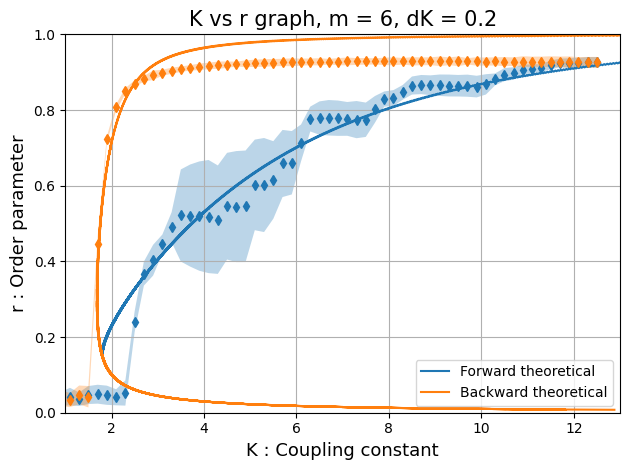

In [24]:
ST = 50
Ks = df.index
Ksr = rdf.index
Create_Folder(DF+f'{dist}/')
for m in ms:
    df = df_sets[m]
    rdf = rdf_sets[m]
    plt.figure(facecolor='white')
    data_rs = np.array([np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))])
    data_std = np.array([np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))])
    data_rrs = np.array([np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))])
    data_rstd = np.array([np.std(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))])
    Draw_ = DD(m=m,dist='Normal')
    # Draw_ = DDD(m=m)
    Draw_.total()
    plt.plot(Ks,data_rs,'d',markersize=5)
    plt.plot(Ksr,data_rrs,'d',markersize=5)
    # plt.errorbar(Ks,data_rs,data_std,fmt='.',color='tab:blue',capsize=2,label='Foward(Blue,K growth)')
    plt.fill_between(Ks,data_rs-data_std,data_rs+data_std,alpha=0.3)
    plt.fill_between(Ksr,data_rrs-data_rstd,data_rrs+data_rstd,alpha=0.3)
    # plt.errorbar(Ksr,data_rrs,data_rstd,fmt='.',color='tab:Orange',capsize=2,label='Backward(Orange,K decrese)')

    # plt.plot(Ks,data_rs,'.',label=r"$Forward$",markersize=6,color = 'Tab:Blue',)
    # plt.plot(Ksr,data_rrs,'.',label=r"$Backward$",markersize=6,color = 'Tab:Orange',)
    plt.legend()  
    plt.title(f'K vs r graph, m = {m}, dK = {dK}',fontsize= 15)
    plt.grid()

    plt.xlim(1,13)
    plt.ylim(0,1)

    plt.xlabel('K : Coupling constant',fontsize=13)
    plt.ylabel('r : Order parameter',fontsize=13)
    plt.tight_layout()
    # plt.savefig(DF+f'{dist}/m = {m}, dK = {dK}, K vs r graph.png',dpi=400)

In [287]:
data__rs = np.array([np.min(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))])
data__rs_idx = np.array([np.argmax(df.rs.iloc[i]) for i in range(len(Ks))])
min_r = np.argmin(data__rs)

In [89]:
def mean_wtime(x):
    temp = x[-200:,:]
    result = np.mean(temp,axis=0)
    return result
def last(x):
    temp = x[-1,:]
    # result = np.mean(temp,axis=0)
    return temp
df = df_sets[m]
# mtheta_df = df.theta_s.apply(mean_wtime)
mtheta_df = df.theta_s.apply(last)
seg_theta = mtheta_df.iloc[0]
i,j = np.meshgrid(seg_theta,seg_theta)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


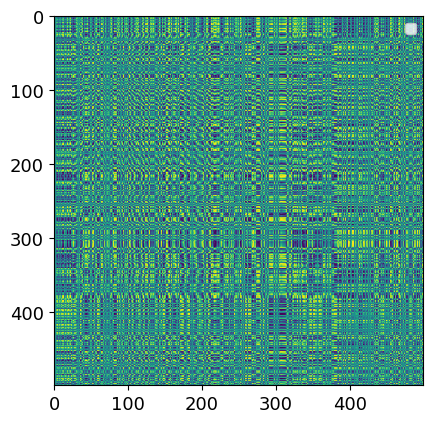

In [90]:
plt.imshow(np.sin(j-i),label='K = K')
plt.legend()

In [ ]:
import math

In [ ]:
def mean_wtime(x):
    temp = x[-200:,:]
    result = np.mean(temp,axis=0)
    return result
m = 6
df,rdf = df_sets[m],rdf_sets[m]
mtheta_df = df.theta_s.apply(mean_wtime)
mtheta_rdf = rdf.theta_s.apply(mean_wtime)

In [ ]:
m = 6
df = df_sets[m]
rdf = rdf_sets[m]
data_rs = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
data_std = [np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
data_rrs = [np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
data_rstd = [np.std(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
max_std = np.argmax(data_std)
min_std = np.argmin(data_std)
print(Ks[max_std],Ks[min_std])


4.3 11.5


In [229]:
ST = 50
Ks = df.index
Ksr = rdf.index
Create_Folder(DF+f'{dist}/')
def Draw_Kr(m,ax):
    df = df_sets[m]
    rdf = rdf_sets[m]
    data_rs = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_std = [np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rrs = [np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rstd = [np.std(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    categories = ['Theoretical', 'Simulated']
    Draw_ = DD(m=m,dist='Normal')
    # Draw_ = DDD(m=m)
    plt.sca(ax)
    fw,(bw,bwd) = Draw_.total()


    err_fw = plt.errorbar(Ks,data_rs,data_std,fmt='.',color='tab:blue',capsize=2,label=r'Foward($K\uparrow$)')
    err_bw = plt.errorbar(Ksr,data_rrs,data_rstd,fmt='.',color='tab:Orange',capsize=2,label=r'Backward($K\downarrow$)')
    p5, = plt.plot([0], marker='None',
           linestyle='None', label='dummy-tophead')
    p7, = plt.plot([0],  marker='None',
           linestyle='None', label='dummy-empty')
    
    leg3 = plt.legend([p5, fw, err_fw, p5, bw, err_bw],
                      [r'Foward($K\uparrow$)'] + categories + [r'Backward($K\downarrow$)'] + categories,
                      loc = 4,ncol=2) # Two columns, vertical group labels
#     leg4 = plt.legend([p5, p7, p5, p7, fw, err_fw, bw, err_bw],
#               [r'Foward($K\uparrow$)', '', r'Backward($K\downarrow$)', ''] + categories + categories,
#               loc=4, ncol=2) # Two columns, horizontal group labels
    
    plt.grid()

    plt.xlim(0,13)
    plt.ylim(0,1)

    plt.xlabel('Coupling constant(K)',fontsize=13)
    plt.ylabel('Order parameter(r)',fontsize=13)
    plt.tight_layout()
    # plt.savefig(DF+f'{dist}/m = {m}, dK = {dK}, K vs r graph.png',dpi=400)
def make_sinij(m,K_idx,ax):
    def mean_wtime(x):
        temp = x[-200:,:]
        result = np.mean(temp,axis=0)
        return result
    def last(x):
        temp = x[-1,:]
        # result = np.mean(temp,axis=0)
        return temp
    plt.sca(ax)
    df = df_sets[m]
    # mtheta_df = df.theta_s.apply(mean_wtime)
    mtheta_df = df.theta_s.apply(last)
    seg_theta = mtheta_df.iloc[K_idx]
    i,j = np.meshgrid(seg_theta,seg_theta)
    im = plt.imshow(np.sin(j-i),vmin=-1,vmax=1,cmap = 'seismic',origin='lower',aspect='auto')
    plt.xticks([0,500])
    plt.yticks([0,500])
    plt.xlabel('i-th oscillator',fontsize=15)
    plt.ylabel('j-th oscillator',fontsize=15)
    # plt.title(f'K = {Ks[K_idx]}',fontsize=18)
    div = make_axes_locatable(ax)
    cax = div.append_axes("right", size="2%", pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    cbar.set_ticks([-1,0,1])
    cbar.set_label(r'$\sin(\theta_j-\theta_i)$')
def make_sinij_nocbar(m,K_idx,ax):
    def mean_wtime(x):
        temp = x[-200:,:]
        result = np.mean(temp,axis=0)
        return result
    def last(x):
        temp = x[-1,:]
        # result = np.mean(temp,axis=0)
        return temp
    plt.sca(ax)
    df = df_sets[m]
    # mtheta_df = df.theta_s.apply(mean_wtime)
    mtheta_df = df.theta_s.apply(last)
    seg_theta = mtheta_df.iloc[K_idx]
    i,j = np.meshgrid(seg_theta,seg_theta)
    im = plt.imshow(np.sin(j-i),vmin=-1,vmax=1,cmap = 'seismic',origin='lower',aspect='auto')
    plt.xticks([0,500])
    plt.yticks([0,500])
    plt.xlabel('i-th oscillator',fontsize=15)
    plt.ylabel('j-th oscillator',fontsize=15)

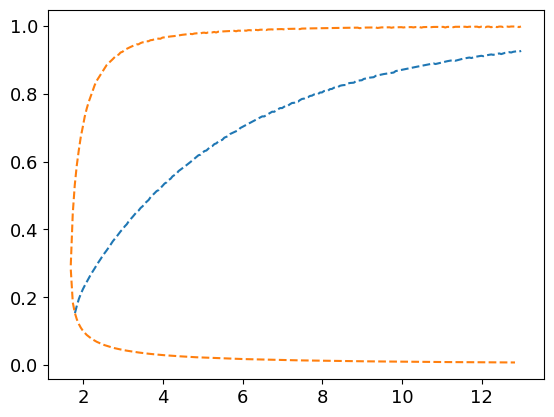

In [230]:
Draw_Kr(m,ax1)
make_sinij(m,0,ax2)
make_sinij_nocbar(m,max_std,ax3)
make_sinij(m,min_std,ax4)
ax4.set_ylabel('')
ax1.set_title('(a)',fontsize=15,loc='left')
ax2.set_title('(b)',fontsize=15,loc='left')
ax3.set_title('(c)',fontsize=15,loc='left')
ax4.set_title('(d)',fontsize=15,loc='left')
plt.tight_layout()
fig

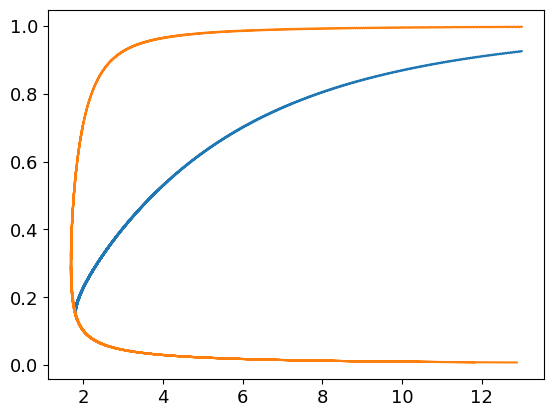

In [223]:
fig = plt.figure()
Draw_ = DD(m=m,dist='Normal')
    # Draw_ = DDD(m=m)
# plt.sca(ax)
fw,(bw,bwd) = Draw_.total()

In [ ]:
bw_x , bw_y = bw.get_data()
bwd_x , bwd_y = bwd.get_data()

In [220]:

# fw_r = fw_y[fw_K]

In [213]:
np.r_[[12,3,4,5],[2,4,5,6]]

array([12,  3,  4,  5,  2,  4,  5,  6])

In [226]:
# mean_graph(fw)
# mean_graph(bw)
# mean_graph(bwd)


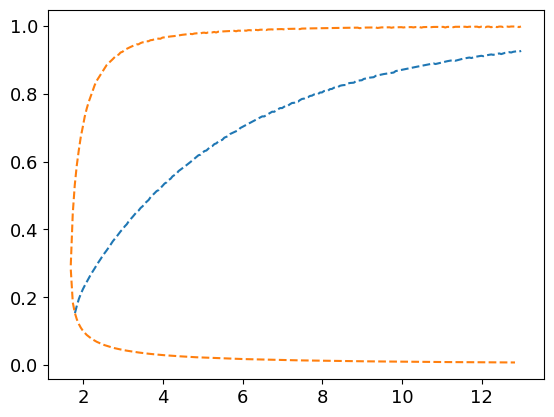

In [227]:

fig

In [44]:
a = np.random.random((2,10,3))
b = np.random.random((2,10,3))

In [50]:
np.cross(a,b).shape

(2, 10, 3)

In [89]:
import networkx as nx
import matplotlib as mpl
G = nx.grid_graph(dim=(10,10))

In [14]:
from math import pi

import numpy as np
import rustworkx as rx
from qiskit_nature.second_q.hamiltonians.lattices import (
    BoundaryCondition,
    HyperCubicLattice,
    Lattice,
    LatticeDrawStyle,
    LineLattice,
    SquareLattice,
    TriangularLattice,
)
from qiskit_nature.second_q.hamiltonians import FermiHubbardModel

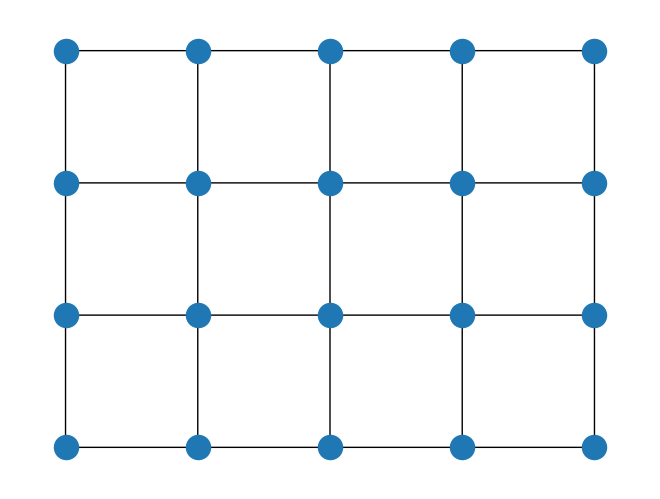

In [18]:
rows = 5
cols = 4
boundary_condition = BoundaryCondition.OPEN
square_lattice = SquareLattice(rows=rows, cols=cols, boundary_condition=boundary_condition)

square_lattice.draw()
square_lattice.node_indexes

In [47]:
import matplotlib.pyplot as plt
from rustworkx.visualization import mpl_draw

In [104]:
L = 10
rows = L
cols = L
boundary_condition = (
    BoundaryCondition.PERIODIC,
    BoundaryCondition.PERIODIC,
)  # open in the x-direction, periodic in the y-direction
square_lattice = SquareLattice(rows=rows, cols=cols, boundary_condition=boundary_condition)
Aij = square_lattice.to_adjacency_matrix()
# plt.savefig()

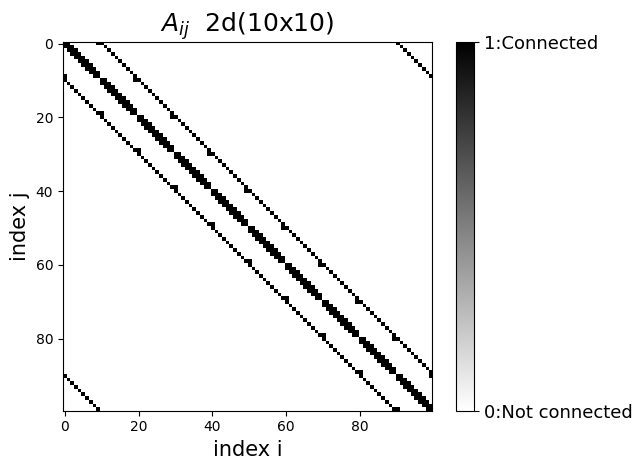

In [105]:
plt.imshow(Aij,cmap='gray_r')
cbar = plt.colorbar()
plt.xlabel('index i',fontsize=15)
plt.ylabel('index j',fontsize=15)
plt.title(r'$A_{ij}$  '+ f'2d({L}x{L})',fontsize=18)
cbar.set_ticks([0,1])
cbar.set_ticklabels(['0:Not connected','1:Connected'],fontsize=13)
plt.tight_layout()
plt.savefig('잡다한 연습/2D aij.png',dpi=400,transparent=True)

# plt.title(r'$A_{ij}$ adjacency matrix'+ f'3d({L}x{L}x{L})')

In [108]:
L = 5
size = (L,L,L)
boundary_condition = (
    BoundaryCondition.PERIODIC,
    BoundaryCondition.PERIODIC,
    BoundaryCondition.PERIODIC,
)
cubic_lattice = HyperCubicLattice(size=size, boundary_condition=boundary_condition)

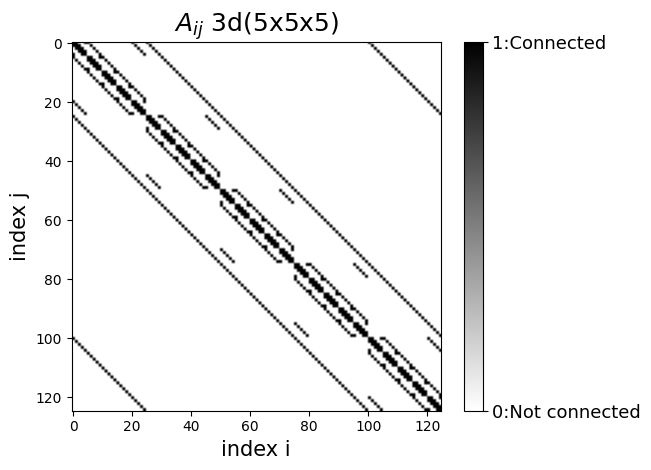

In [109]:
Aij = cubic_lattice.to_adjacency_matrix()
plt.imshow(Aij,cmap='gray_r')
cbar = plt.colorbar()
plt.title(r'$A_{ij}$ '+ f'3d({L}x{L}x{L})',fontsize=18)
cbar.set_ticks([0,1])
plt.xlabel('index i',fontsize=15)
plt.ylabel('index j',fontsize=15)
cbar.set_ticklabels(['0:Not connected','1:Connected'],fontsize=13)
plt.tight_layout()
plt.savefig('잡다한 연습/3D aij.png',dpi=400,transparent=True)

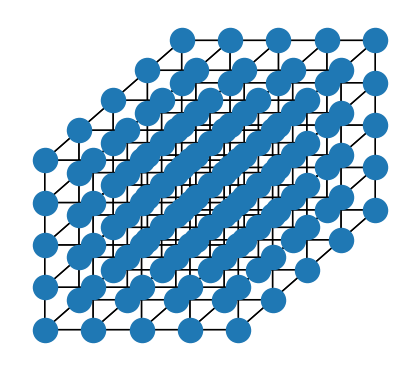

In [107]:
# function for setting the positions
def indextocoord_3d(index: int, size: tuple, angle) -> list:
    z = index // (size[0] * size[1])
    a = index % (size[0] * size[1])
    y = a // size[0]
    x = a % size[0]
    vec_x = np.array([1, 0])
    vec_y = np.array([np.cos(angle), np.sin(angle)])
    vec_z = np.array([0, 1])
    return_coord = x * vec_x + y * vec_y + z * vec_z
    return return_coord.tolist()


pos = dict([(index, indextocoord_3d(index, size, angle=pi / 4)) for index in range(np.prod(size))])
plt.figure(figsize=(4,3.5))

cubic_lattice.draw(style=LatticeDrawStyle(pos=pos))

plt.savefig('잡다한 연습/3D Lattice.png',dpi=400,transparent=True)

## phase-order-parameter

In [54]:
a